<b>K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subsets (clusters). The algorithm aims to group similar data points into clusters, where each cluster has a centroid that represents the mean of the data points in that cluster. K-means is widely used for various applications, including image segmentation, customer segmentation, and anomaly detection.</b>

Here's a step-by-step explanation of the K-means algorithm:

<b>Initialization:</b>

*   Choose the number of clusters, K.

*   Randomly initialize K cluster centroids in the feature space.
   
*   Assign each data point to the nearest centroid, forming K clusters.


<b>Update Centroids:</b>

*   Calculate the mean of all data points in each cluster.

*   Update the centroid of each cluster to the calculated mean.

*   Repeat steps 2 and 3 until convergence. Convergence occurs when the
    centroids no longer change significantly or after a specified number of iterations.

<b>Result:</b>

*   The algorithm converges, and each data point is assigned to one of the K
    clusters.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Replace categorical values to encoded data using LabelEncoder

In [ ]:
le = LabelEncoder()
encoded = le.fit_transform(data['species'])
encoded
data['Categories_species']=encoded
data.drop('species', axis=1, inplace=True)

## Seperate the input (x) and output features (y)

In [ ]:
x = data.drop(['Categories_species'],axis=1)
y = data['Categories_species']

## Perform Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Building your model

In [ ]:
clustering=KMeans(n_clusters=3, random_state=5)
clustering.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[3.98940603, 0.21295824, 3.12119834],
       [4.01793312, 0.99604549, 2.6755083 ],
       [4.19343668, 0.65198444, 2.97416665],
       [4.19784749, 0.9034561 , 2.88014429],
       [4.11157152, 0.40215457, 3.30022609],
       [3.89893116, 1.21154793, 3.50554424],
       [4.21638048, 0.50244932, 3.14856384],
       [3.97313411, 0.09132468, 2.99184826],
       [4.40757189, 1.42174651, 2.92515933],
       [4.05764261, 0.78993078, 2.79398956],
       [3.92088109, 0.78999385, 3.32125333],
       [4.07853631, 0.27618123, 3.0493632 ],
       [4.16440431, 1.03497888, 2.80635045],
       [4.63069748, 1.33482453, 3.21220972],
       [4.14619343, 1.63865558, 3.88834965],
       [4.49547518, 2.39898792, 4.4998303 ],
       [4.02966144, 1.20748818, 3.60978017],
       [3.91388548, 0.21618828, 3.05594182],
       [3.72562039, 1.20986655, 3.34493953],
       [4.10101938, 0.86706182, 3.50065397],
       [3.66383713, 0.50401564, 2.80825681],
       [3.94496718, 0.66826437, 3.27800809],
       [4.

## Plotting your model outputs

Text(0.5, 1.0, 'Original- Clustering')

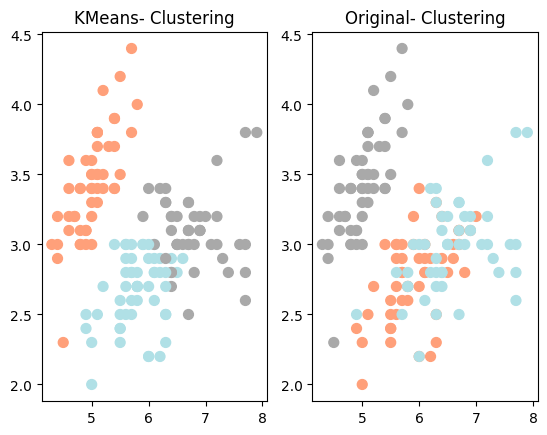

In [ ]:
color_theme=np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=data.sepal_length, y=data.sepal_width, c=color_theme[clustering.labels_], s=50)
plt.title("KMeans- Clustering")


plt.subplot(1,2,2)
plt.scatter(x=data.sepal_length, y=data.sepal_width, c=color_theme[data.Categories_species], s=50)
plt.title("Original- Clustering")



## Evaluate Clustering Results

In [ ]:
relabel=np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
                                                                                    ````````````````````````````````````````````````````````````````````````````````````````````